## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "mouse-metadata.csv"
study_results_path = "study-results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_merged.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [31]:
# Checking the number of mice.
len(study_merged["Mouse ID"].unique())


249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_id = study_merged.loc[study_merged.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicated_mouse_id

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id_data = study_merged.loc[study_merged["Mouse ID"] == "g989"]
duplicated_id_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = study_merged[study_merged['Mouse ID'].isin(duplicated_mouse_id)==False]

clean_mouse_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [44]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = clean_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({
    'Mean Tumor Volume':means,
    'Median Tumor Volume':medians,
    'Tumor Volume Variances':variances,
    'Tumor Volume Standard Deviation':std,
    'Tumor Volume Standard Error':sem
})
summary_table

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variances  \
Drug Regimen                                                                   
Capomulin             40.675741            41.557809               24.947764   
Ceftamin              52.591172            51.776157               39.290177   
Infubinol             52.884795            51.820584               43.128684   
Ketapril              55.235638            53.698743               68.553577   
Naftisol              54.331565            52.509285               66.173479   
Placebo               54.033581            52.288934               61.168083   
Propriva              52.320930            50.446266               43.852013   
Ramicane              40.216745            40.673236               23.486704   
Stelasyn              54.233149            52.431737               59.450562   
Zoniferol             53.236507            51.818479               48.533355   

              Tumor Volume Standard Deviation  Tumor Volume Standard Error  
Drug Regimen                                                                
Capomulin                            4.994774                     0.329346  
Ceftamin                             6.268188                     0.469821  
Infubinol                            6.567243                     0.492236  
Ketapril                             8.279709                     0.603860  
Naftisol                             8.134708                     0.596466  
Placebo                              7.821003                     0.581331  
Propriva                             6.622085                     0.544332  
Ramicane                             4.846308                     0.320955  
Stelasyn                             7.710419                     0.573111  
Zoniferol                            6.966589                     0.516398

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

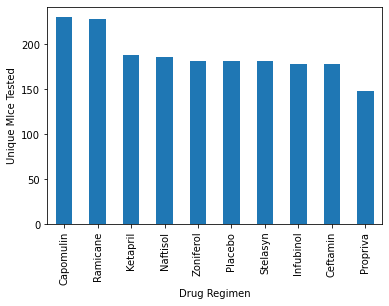

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counts = clean_mouse_df['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Unique MIce Tested")
plt.show()

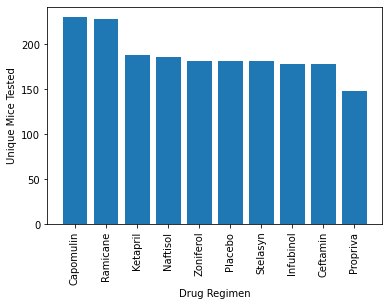

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = clean_mouse_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Unique Mice Tested")
plt.show()


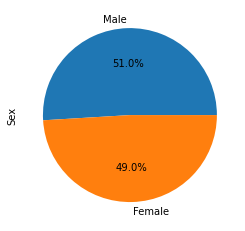

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#counts = clean_study_data_complete.Sex.value_counts()
#counts.plot(kind="pie",autopct='%1.1f%%')
#plt.show()

counts = clean_mouse_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

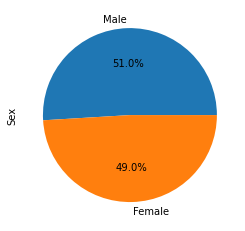

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_mouse_df.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = clean_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_max = tumor_max.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_df = tumor_max.merge(clean_mouse_df,on=['Mouse ID','Timepoint'],how="left")
merged_max_df.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1

In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol", "Ceftamin", "Propriva"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final = merged_max_df.loc[merged_max_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor_vol_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_bound) | (tumor_vol_final > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


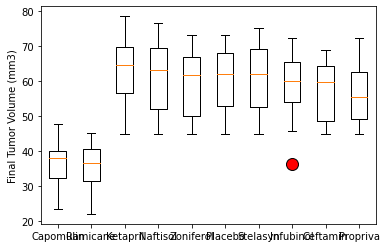

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = treatments,flierprops=box_plot)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

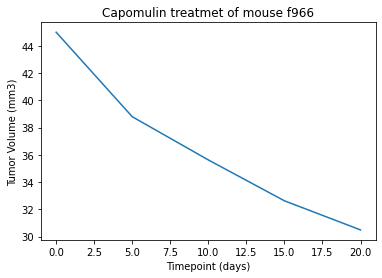

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
mousedata = capomulin.loc[capomulin["Mouse ID"]== 'f966']
plt.plot(mousedata["Timepoint"],mousedata['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmet of mouse f966")
plt.show()

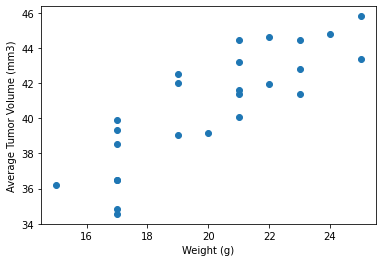

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_avr = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avr["Weight (g)"],capomulin_avr["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


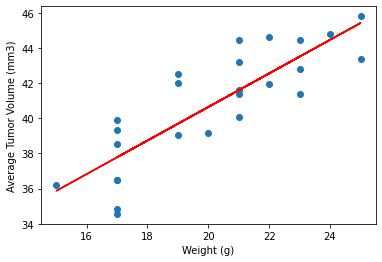

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor=round(st.pearsonr(capomulin_avr["Weight (g)"],capomulin_avr['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {cor}")
model = st.linregress(capomulin_avr["Weight (g)"],capomulin_avr["Tumor Volume (mm3)"])

y_values = capomulin_avr["Weight (g)"]*model[0]+model[1]
plt.scatter(capomulin_avr["Weight (g)"],capomulin_avr['Tumor Volume (mm3)'])
plt.plot(capomulin_avr["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()